170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


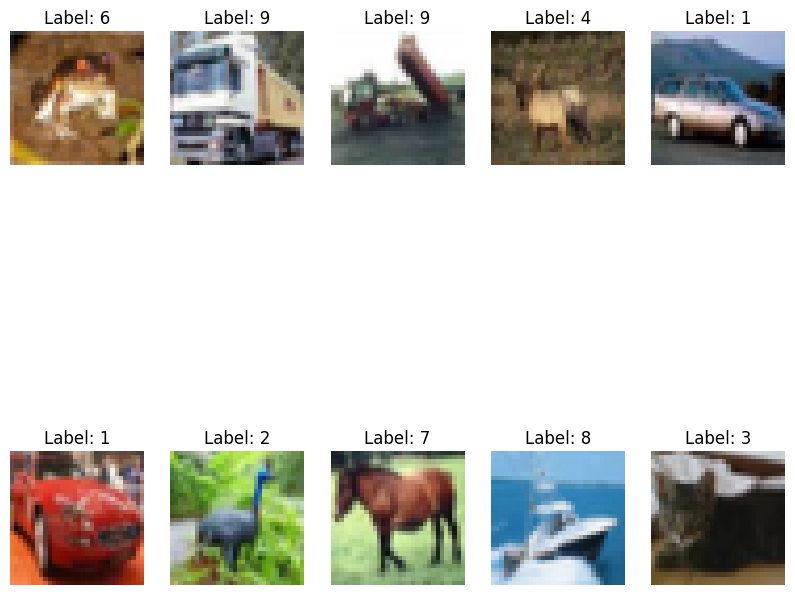

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Завантаження датасету CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Виведення перших 10 зображень
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')
plt.show()


In [2]:
# Нормалізація даних
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Однагарування цільової змінної
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=64,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.3196 - loss: 1.8432 - val_accuracy: 0.5319 - val_loss: 1.3094 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5151 - loss: 1.3595 - val_accuracy: 0.5948 - val_loss: 1.1694 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5691 - loss: 1.2159 - val_accuracy: 0.6235 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6053 - loss: 1.1252 - val_accuracy: 0.6452 - val_loss: 1.0246 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6291 - loss: 1.0603 - val_accuracy: 0.6677 - val_loss: 0.9529 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6514 - loss: 0.9994 - val_accuracy: 0.6800 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.6685 - l

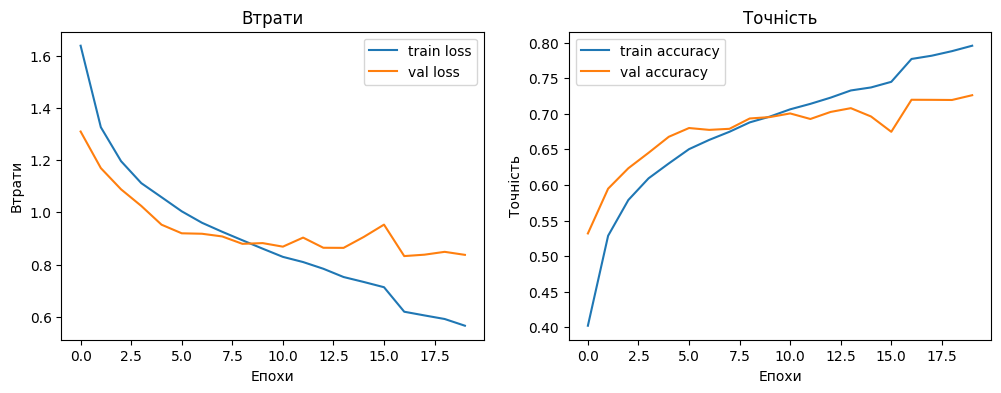

In [5]:
# Графіки втрат і точності
plt.figure(figsize=(12, 4))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.show()


In [6]:
from sklearn.metrics import classification_report

# Прогнозування на тестових даних
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.84      0.81      0.83      1000
           2       0.65      0.57      0.61      1000
           3       0.55      0.52      0.54      1000
           4       0.65      0.69      0.67      1000
           5       0.64      0.61      0.63      1000
           6       0.76      0.82      0.79      1000
           7       0.76      0.77      0.77      1000
           8       0.79      0.84      0.81      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



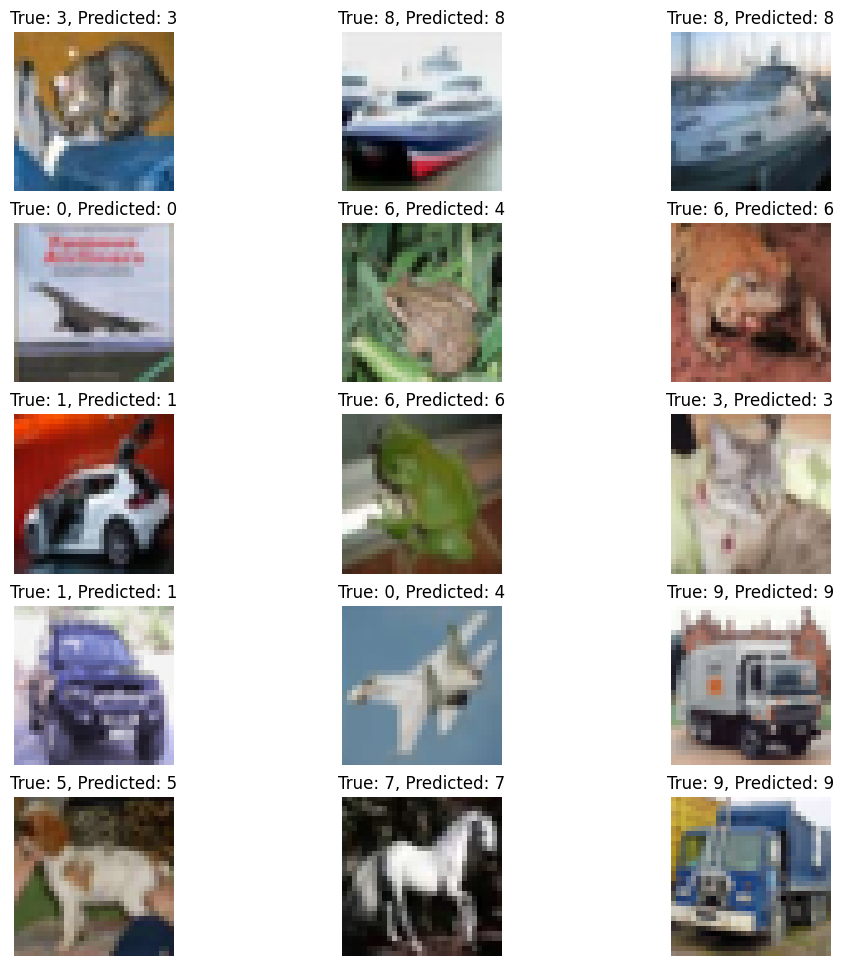

In [7]:
# Візуалізація розпізнавання
plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'True: {y_true_classes[i]}, Predicted: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()


2

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.4354 - loss: 1.6323 - val_accuracy: 0.5470 - val_loss: 1.2871 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.5729 - loss: 1.2249 - val_accuracy: 0.5748 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 806s 1s/step - accuracy: 0.5943 - loss: 1.1627 - val_accuracy: 0.5857 - val_loss: 1.1922 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 802s 1s/step - accuracy: 0.6123 - loss: 1.1167 - val_accuracy: 0.5882 - val_loss: 1.1707 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 797s 1s/step - accuracy: 0.6217 - loss: 1.0904 - val_accuracy: 0.5876 - val_loss: 1.1818 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 802s 1s/step - accuracy: 0.6313 - loss: 1.0561 - val_accuracy: 0.5961 - val_loss: 1.1438 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 813s 1s/step - accuracy: 0.6396 - loss: 1.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)

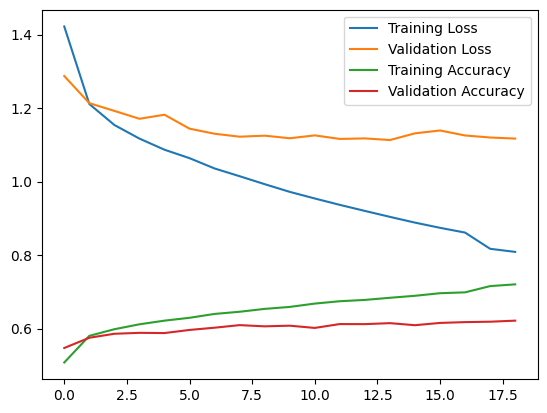

313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 430ms/step
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1000
           1       0.68      0.70      0.69      1000
           2       0.56      0.51      0.53      1000
           3       0.43      0.47      0.45      1000
           4       0.52      0.62      0.57      1000
           5       0.59      0.47      0.53      1000
           6       0.66      0.64      0.65      1000
           7       0.71      0.63      0.67      1000
           8       0.68      0.80      0.73      1000
           9       0.63      0.63      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



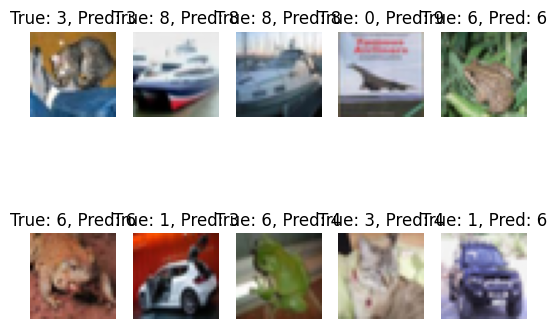

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток класів у формат one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Завантаження попередньо навченої моделі VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожування базових шарів
for layer in base_model.layers:
    layer.trainable = False

# Створення нової моделі
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Рання зупинка та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Виведення summary моделі
model.summary()

# Побудова графіків функції втрат і точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Класифікаційний звіт
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))

# Візуалізація кількох передбачених зображень з їх класами
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()
